In [3]:
import numpy as np

import matplotlib.pyplot as plt

dataset = np.array(
    [['Asset Flip', 100, 1000], 
['Text Based', 500, 3000], 
['Visual Novel', 1500, 5000], 
['2D Pixel Art', 3500, 8000], 
['2D Vector Art', 5000, 6500], 
['Strategy', 6000, 7000], 
['First Person Shooter', 8000, 15000], 
['Simulator', 9500, 20000], 
['Racing', 12000, 21000], 
['RPG', 14000, 25000], 
['Sandbox', 15500, 27000], 
['Open-World', 16500, 30000], 
['MMOFPS', 25000, 52000], 
['MMORPG', 30000, 80000] 
]) 



X = dataset[:, 1:2].astype(int)

print(X)

y = dataset[:, 2].astype(int)

print(y)

[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]
[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]


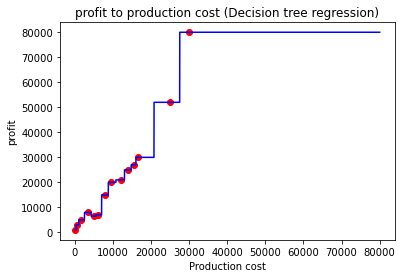

In [4]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)

regressor.fit(X, y)

X_grid =np.arange(min(X), max(y), 0.01)

X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color = "red")

plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

plt.title('profit to production cost (Decision tree regression)')

plt.xlabel('Production cost')

plt.ylabel('profit')

plt.show()

Text(0.5, 1.0, 'Total impurity vs effective alpha for training set ')

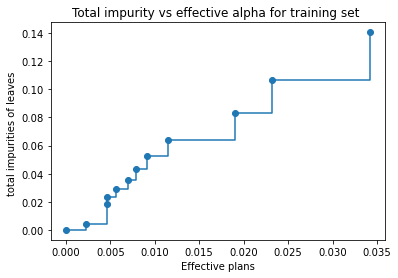

In [5]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier


X, y = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)

path = clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()

ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")

ax.set_xlabel("Effective plans")
ax.set_ylabel("total impurities of leaves ")
ax.set_title("Total impurity vs effective alpha for training set ")



(0.0, 7.88, -0.9, 3.4800000000000044)

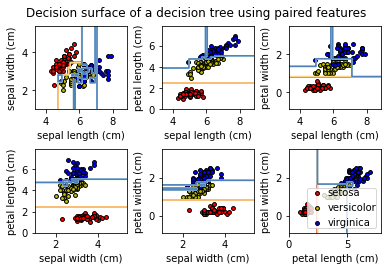

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree


# parameters 

n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


iris = load_iris()

for pairidx, pair in enumerate([[0,1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]) :
    X = iris.data[:, pair]
    y = iris.target



    clf = DecisionTreeClassifier().fit(X, y)
    
    plt.subplot(2, 3, pairidx + 1 )
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    cs = plt.contour(xx, yy, Z, cmap = plt.cm.RdYlBu)
    
    plt.xlabel(iris.feature_names[pair[0]])
    
    plt.ylabel(iris.feature_names[pair[1]])
    
    
    for i, color in zip(range(n_classes), plot_colors) :
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                   cmap = plt.cm.RdYlBu, edgecolor = 'black', s = 15)
        

plt.suptitle("Decision surface of a decision tree using paired features ")
plt.legend(loc = 'lower right', borderpad =0, handletextpad = 0)
plt.axis("tight")
    
    

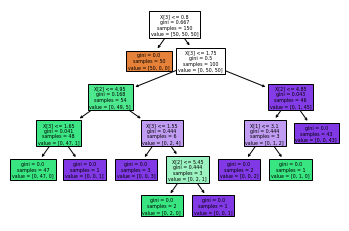

In [8]:
plt.figure()

clf = DecisionTreeClassifier().fit(iris.data, iris.target)

plot_tree(clf, filled = True)

plt.show()